<a href="https://colab.research.google.com/github/Vineet2107/EEG_Pipeline/blob/main/Functional%20Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

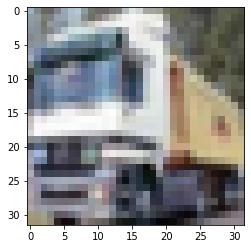

In [ ]:
plt.imshow(x_train[1])

In [ ]:
input = keras.Input(shape=(32,32,3), name='input')
conv1 = Conv2D(16, 3, strides=(2,2),  activation='relu', name='conv1')(input)
conv2 = Conv2D(32, 3, activation='relu', name='conv2')(conv1)
max1 = MaxPooling2D((2,2), name='max1')(conv2)
conv3 = Conv2D(64, 3, activation='relu', name='conv3')(max1)
max2 = MaxPooling2D((2,2), name='max2')(conv3)
flatten = Flatten()(max2)
dense1 = Dense(256, activation='relu', name='dense1')(flatten)
dense2 = Dense(10, activation='relu', name='dense2')(dense1)

model = Model(input, dense2)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 15, 15, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 32)        4640      
_________________________________________________________________
max1 (MaxPooling2D)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          18496     
_________________________________________________________________
max2 (MaxPooling2D)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0   

In [ ]:
print(model.layers[1])
print(model.layers[1].weights)

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
array([[[[ 0.07841554, -0.13055904, -0.11930203, -0.05273917,
           0.1615543 ,  0.03907575, -0.18294103,  0.02868876,
          -0.05600163,  0.12136245,  0.18707222, -0.04686068,
           0.10805848,  0.12869751, -0.08974173, -0.03474084],
         [ 0.0009978 , -0.00770803, -0.09562697,  0.12062708,
          -0.17620842,  0.13181388, -0.13536087, -0.1795475 ,
          -0.18275954, -0.02001898,  0.14897084,  0.06591877,
          -0.1459304 ,  0.00181377,  0.17237133, -0.0341177 ],
         [-0.0078015 , -0.18328491, -0.0863006 ,  0.04912391,
          -0.1578022 ,  0.13331282, -0.01442863,  0.17954713,
          -0.12765342, -0.18157949,  0.15689364,  0.18044603,
          -0.1235674 ,  0.06784341, -0.1009887 , -0.07246746]],

        [[ 0.17895168, -0.09734606, -0.14002064,  0.11857283,
           0.00045253,  0.13751978,  0.00728917, -0.00185429,
          -0.12541597,  0.01589862,  0.14563689,  0.1

In [ ]:
print(model.get_layer('conv2').input)#printing input and output tensor of conv2 layer
print(model.get_layer('conv2').output)

KerasTensor(type_spec=TensorSpec(shape=(None, 15, 15, 16), dtype=tf.float32, name=None), name='conv1/Relu:0', description="created by layer 'conv1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='conv2/Relu:0', description="created by layer 'conv2'")


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history= model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
391/391 [==============================] - 33s 5ms/step - loss: 2.1838 - acc: 0.2475
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0866 - acc: 0.3011
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 2.0313 - acc: 0.3161
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9971 - acc: 0.3256
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9775 - acc: 0.3295
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9563 - acc: 0.3323
Epoch 7/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9415 - acc: 0.3354
Epoch 8/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9277 - acc: 0.3383
Epoch 9/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9112 - acc: 0.3416
Epoch 10/10
391/391 [==============================] - 2s 4ms/step - loss: 1.8971 - acc: 0.3438


In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 0s 4ms/step - loss: 1.9741 - acc: 0.3272
test loss, test acc: [1.9741251468658447, 0.3271999955177307]


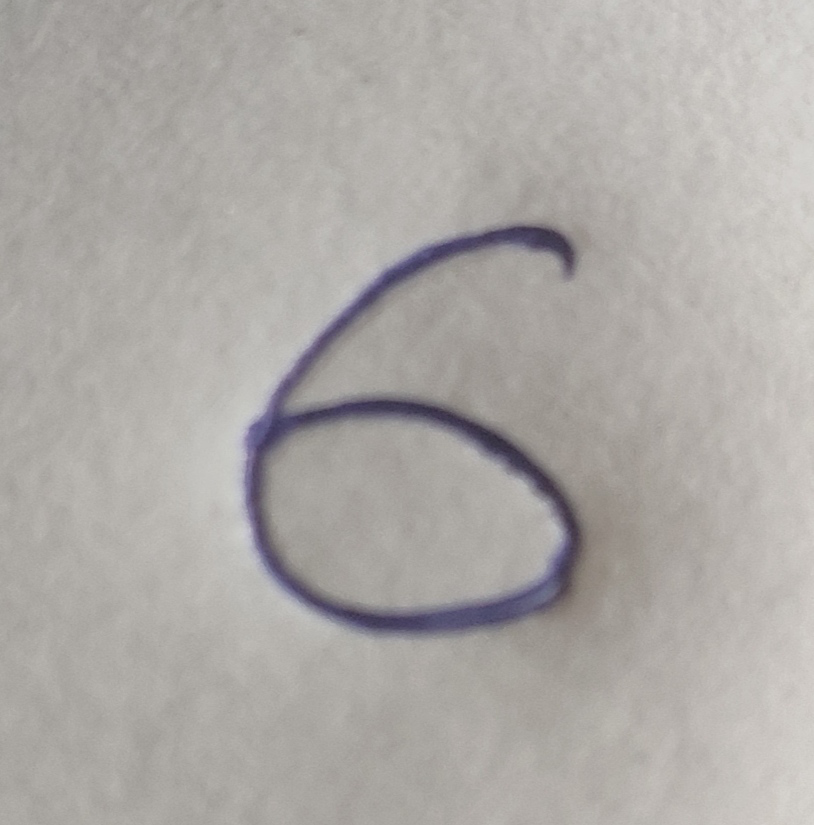

In [ ]:
from PIL import Image
display.display(Image.open('/content/drive/MyDrive/IMG_20210613_145207.jpg'))